In [6]:
import pandas as pd

import decomposition
import potential_data
import scaler
import plots
import fit

pd.options.mode.chained_assignment = None

In [7]:
#for SU(3) QCD make decomposition, show mon+mod, fit original and show linear and coulomb parts shifted
def potential_decomposition(size, decomp_params, fit_range, smearing_step, T_max):
    path = f'/home/ilya/soft/lattice/observables/result/smearing/potential/wilson_loop/fundamental/on-axis/su3/QCD/140MeV/{size}'
    paths = {'original': {'path' : f'{path}/HYP0_APE_alpha=0.6/potential_original.csv', 'parameters': {'name': 'SU3'}, 'constraints': {'T': (1, 6), 'r/a': (1, 20), 'smearing_step': (smearing_step, smearing_step)}},
            'monopole': {'path' : f'{path}/HYP0_APE_alpha=0.6/{decomp_params}/potential_monopole.csv', 'parameters': {'name': 'mon'}, 'constraints': {'T': (T_max - 1, T_max - 1), 'r/a': (1, 20), 'smearing_step': (smearing_step, smearing_step)}},
            'monopoless': {'path' : f'{path}/HYP0_APE_alpha=0.6/{decomp_params}/potential_monopoless.csv', 'parameters': {'name': 'mod'}, 'constraints': {'T': (T_max - 2, T_max - 2), 'r/a': (1, 20), 'smearing_step': (smearing_step, smearing_step)}}}
#     r0 = scaler.get_r0(beta)
#     fit_range = tuple([r0*x for x in fit_range])
    data = potential_data.DataDecomposition(paths)
    data.fit_original_T((1, 5), 'original')
    # data.fit_original_T((2, 8), 'monopoless')
#     data.scale_potentials(r0)
    data.find_sum('monopole', 'monopoless')
    data.df = data.df.drop('T', axis = 1)
    fitting_info = {'original': {'fit_range': fit_range, 'fit_func': fit.func_quark_potential, 'fit_parameters': ['V0', 'alpha', 'sigma']}}
    df_fits = fit.fit_potentials(data.df, fitting_info)
    df_fits['name'] = 'SU3'
    fit_params_original = fit.make_fit(data.df.loc[data.df['potential_type'] == 'original', ['r/a','aV(r)', 'err']], fit_range, fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err')
    fit_shifted = fit.fit_from_original(data.df, 'monopole', fit.func_linear, [fit_params_original.loc[0, 'sigma']])
    fit_shifted['name'] = 'mon'
    df_fits = pd.concat([fit_shifted, df_fits])
    fit_shifted = fit.fit_from_original(data.df, 'monopoless', fit.func_coloumb, [fit_params_original.loc[0, 'alpha']])
    fit_shifted['name'] = 'mod'
    df_fits = pd.concat([fit_shifted, df_fits])
    image_path = '../../images/potential/decomposition/su3/QCD/140MeV'
    image_name = f'potential_decomposition_{size}'
    image_name = image_name.replace('.', 'p')
    # print(data.df)
    # print(df_fits)
    plots.plot_potential_single(data.df, 'r/a', 'aV(r)', 'err', 'name', r'$r/r_{0}$', r'$r_{0}V(r)$', f'potential decomposition {size}', image_path, image_name, True, df_fits=df_fits)
    # plots.plot_potential_single(data.df, 'r/a', 'aV(r)', 'err', 'name', r'$r/r_{0}$', r'$r_{0}V(r)$', f'potential decomposition {size}', image_path, image_name, True)

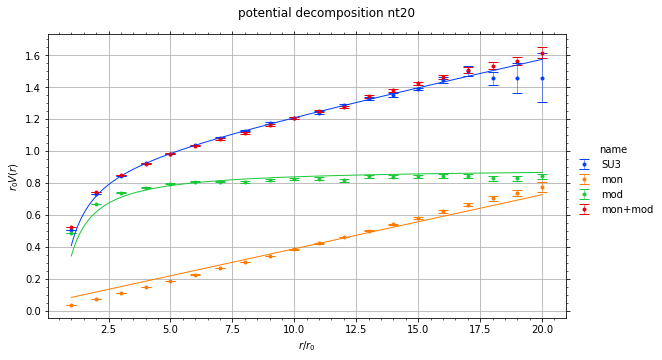

../../images/potential/decomposition/su3/QCD/140MeV/potential_decomposition_nt20


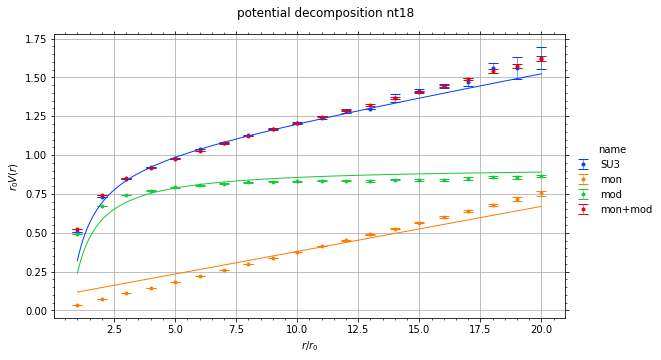

../../images/potential/decomposition/su3/QCD/140MeV/potential_decomposition_nt18


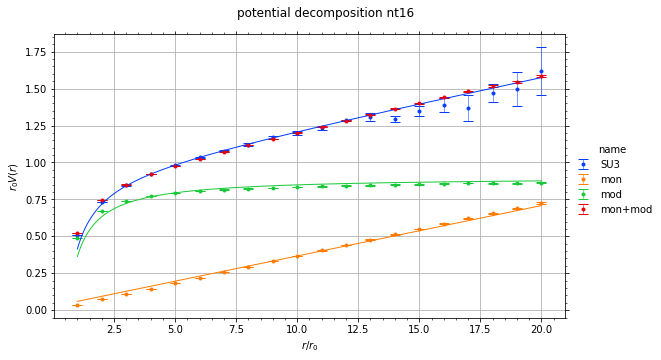

../../images/potential/decomposition/su3/QCD/140MeV/potential_decomposition_nt16


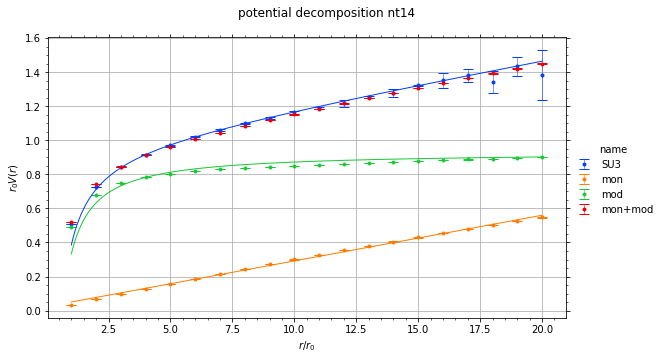

../../images/potential/decomposition/su3/QCD/140MeV/potential_decomposition_nt14


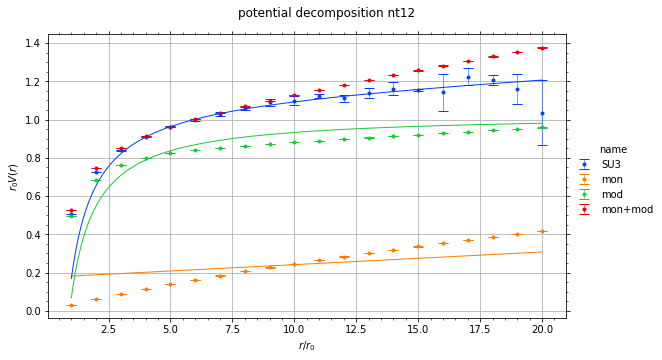

../../images/potential/decomposition/su3/QCD/140MeV/potential_decomposition_nt12


In [8]:
potential_decomposition('nt20', 'steps_500/copies=1', (4, 16), 26, 9)
potential_decomposition('nt18', 'steps_500/copies=1', (4, 16), 26, 8)
potential_decomposition('nt16', 'steps_500/copies=1', (4, 16), 26, 7)
potential_decomposition('nt14', 'steps_2000/copies=1', (4, 16), 26, 6)
potential_decomposition('nt12', 'steps_2000/copies=1', (4, 16), 26, 5)

In [4]:
#for SU(3) gluodynamics make decomposition, show mon+mod, fit original and show linear and coulomb parts shifted
def potential_decomposition(beta, size, decomp_params, fit_range):
    path = f'/home/ilya/soft/lattice/observables/result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/{size}/beta{beta}'
    paths = {'original': {'path' : f'{path}/HYP0_APE_alpha=0.5/potential_original.csv', 'parameters': {'name': 'SU3'}},
            'monopole': {'path' : f'{path}/HYP0_APE_alpha=0.5/{decomp_params}/potential_monopole.csv', 'parameters': {'name': 'mon'}, 'constraints': {'T': (fit_range[1]-1, fit_range[1]-1)}},
            'monopoless': {'path' : f'{path}/HYP0_APE_alpha=0.5/{decomp_params}/potential_monopoless.csv', 'parameters': {'name': 'mod'}, 'constraints': {'T': (8, 8)}}}
    r0 = scaler.get_r0(beta)
    fit_range = tuple([r0*x for x in fit_range])
    data = potential_data.DataDecomposition(paths)
    data.fit_original_T((2, 8), ['name'])
    data.scale_potentials(r0)
    data.find_sum('monopole', 'monopoless')
    data.df = data.df.drop('T', axis = 1)
    fitting_info = {'original': {'fit_range': fit_range, 'fit_func': fit.func_quark_potential, 'fit_parameters': ['V0', 'alpha', 'sigma']}}
    df_fits = fit.fit_potentials(data.df, fitting_info)
    fit_params_original = fit.make_fit(data.df.loc[data.df['potential_type'] == 'original', ['r/a','aV(r)', 'err']], fit_range, fit.func_quark_potential, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', 'err')
    fit_shifted = fit.fit_from_original(data.df, 'monopole', fit.func_linear, [fit_params_original.loc[0, 'sigma']])
    df_fits = pd.concat([fit_shifted, df_fits])
    fit_shifted = fit.fit_from_original(data.df, 'monopoless', fit.func_coloumb, [fit_params_original.loc[0, 'alpha']])
    df_fits = pd.concat([fit_shifted, df_fits])
    image_path = '../../images/potential/decomposition/su3/gluodynamics'
    image_name = f'potential_decomposition_beta{beta}'
    image_name = image_name.replace('.', 'p')
    plots.plot_potential_single(data.df, 'r/a', 'aV(r)', 'err', 'name', r'$r/r_{0}$', r'$r_{0}V(r)$', r'potential decomposition $\beta=$' + f'{beta}', image_path, image_name, True, df_fits=df_fits)

In [5]:
potential_decomposition(6.0, '24^4', 'steps_0/copies=1', (2, 12))
potential_decomposition(6.0, '24^4', 'steps_2/copies=1', (2, 12))
potential_decomposition(6.0, '24^4', 'steps_500/copies=4', (2, 12))
potential_decomposition(6.1, '28^4', 'steps_500/copies=3', (2, 14))
potential_decomposition(6.2, '32^4', 'steps_500/copies=3', (2, 16))
potential_decomposition(6.3, '36^4', 'steps_500/copies=4', (2, 18))

ValueError: ('Lengths must match to compare', (156,), (1,))

In [6]:
#relative deviation of potential decomposition
def relative_deviation_single(beta, size, decomp_params, fit_range):
    path = f'/home/ilya/soft/lattice/observables/result/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/{size}/beta{beta}'
    paths = {'original': {'path' : f'{path}/HYP0_APE_alpha=0.5/potential_original.csv', 'parameters': {'name': 'SU3', 'beta': beta}},
            'monopole': {'path' : f'{path}/HYP0_APE_alpha=0.5/{decomp_params}/potential_monopole.csv', 'parameters': {'name': 'mon', 'beta': beta}, 'constraints': {'T': (fit_range[1]-1, fit_range[1]-1)}},
            'monopoless': {'path' : f'{path}/HYP0_APE_alpha=0.5/{decomp_params}/potential_monopoless.csv', 'parameters': {'name': 'mod', 'beta': beta}, 'constraints': {'T': (8, 8)}}}
    r0 = scaler.get_r0(beta)
    fit_range = tuple([r0*x for x in fit_range])
    data = potential_data.DataDecomposition(paths)
    data.fit_original_T((2, 8), ['name', 'beta'])
    data.scale_potentials(r0)
    data.find_sum('monopole', 'monopoless')
    data.remove_from_plot(['monopole', 'monopoless'])
    data.find_difference('original', 'monopole+monopoless')
    data.remove_from_plot(['monopole+monopoless'])
    data.find_ratio('original-monopole+monopoless', 'original')
    data.remove_from_plot(['original-monopole+monopoless', 'original'])
    data.df.loc[data.df['potential_type'] == 'original-monopole+monopoless', 'name'] = 'relative deviation'
    data.df = data.df.drop('T', axis = 1)
    return data.df

def relative_deviation(params):
    df = []
    for par in params:
        df.append(relative_deviation_single(*par))
    df = pd.concat(df)
    image_path = '../../images/potential/decomposition_relative_deviation/su3/gluodynamics'
    image_name = f'decomposition_relative_deviation'
    plots.plot_potential_single(df, 'r/a', 'aV(r)', 'err', 'beta', r'$r/r_{0}$', r'$r_{0}V(r)$', r'relative deviation $\beta=$', image_path, image_name, True)

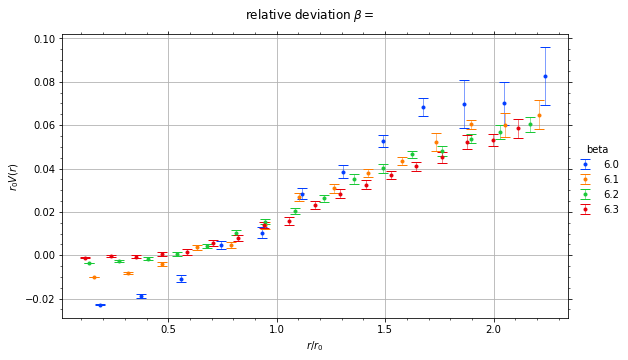

../../images/potential/decomposition_relative_deviation/su3/gluodynamics/decomposition_relative_deviation


In [7]:
params = [[6.0, '24^4', 'steps_500/copies=4', (2, 12)],
          [6.1, '28^4', 'steps_500/copies=3', (2, 14)],
          [6.2, '32^4', 'steps_500/copies=3', (2, 16)],
          [6.3, '36^4', 'steps_500/copies=4', (2, 18)]]
relative_deviation(params)